## Datos anteriores

In [30]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 1. Crear una columna de facturación total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# Asegurarse de que la columna 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna con el mes como texto completo
df["mes_nombre"] = df["fecha"].dt.strftime("%B")  # e.g., 'January', 'February', etc.

# Crear columna con el número del mes para ordenar correctamente
df["mes_numero"] = df["fecha"].dt.month

# Calcular la facturación mensual
ventas_mensuales = (
    df.groupby(["mes_numero", "mes_nombre"])["facturacion"].sum().reset_index()
)

# Ordenar por número de mes
ventas_mensuales = ventas_mensuales.sort_values("mes_numero")

# Diccionario de traducción de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Aplicar traducción
ventas_mensuales["mes"] = ventas_mensuales["mes_nombre"].map(meses)

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y método de pago, sumando facturación
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# Filtrar solo las 3 categorías deseadas
categorias_interes = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df["categoria"].isin(categorias_interes)]

# Agrupar por trimestre y categoría, sumando la facturación
ventas_categoria = (
    df_filtrado.groupby(["trimestre", "categoria"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

# Definiendo los colores del proyecto

Ya teniendo los gráficos que representan las reglas de negocio, será tiempo de enfocarse en la definición de los aspectos estéticos de las gráficas.

## Paleta de colores de Zoop

![](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png)

## Paleta de colores del proyecto
|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;

In [31]:
# Adicionamos los colores al proyecto
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = (
    "#ffffff",
    "#ebebeb",
    "#d9d9d9",
    "#cccccc",
    "#555655",
    "#231f20",
)
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

## ¿Por qué definimos nosotros mismos los colores del proyecto?

### Percepción humana de los colores:
Nuestro cerebro interpreta los colores de manera única, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepción humana para asegurar que la información se transmita de manera clara y eficaz. Además de seguir la identidad visual de Zoop, es decir, dar esa sensación de que el visual es de Zoop.

### Accesibilidad:
Ciertas combinaciones de colores pueden ser difíciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aquí seguiremos algunas directrices y recomendaciones para crear gráficos accesibles.

### IA vs. elección de colores:
Mientras que la IA puede realizar tareas complejas, como análisis de datos y reconocimiento de patrones, aún no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aquí es donde entra nuestra intervención creativa y consideración humana.

### Experiencia visual:
¿Las personas pueden entender la información transmitida por los gráficos? ¿Existe algún "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar técnicas para mejorar la experiencia visual, como el contraste adecuado, la elección cuidadosa de los colores de la paleta y el destaque de elementos clave.

¿Vamos ahora a sumergirnos en la práctica e incorporar estos conceptos a nuestro proyecto?

# Iniciando el storytelling

## Añadiendo etiquetas y rótulos

Se elegirá uno de los visuales generados anteriormente para comprender cómo se podría utilizar la IA para agregar los colores ideales, etiquetas de los datos, títulos y etiquetas de los ejes.

**Gráfico elegido: *Métodos de pago utilizados***

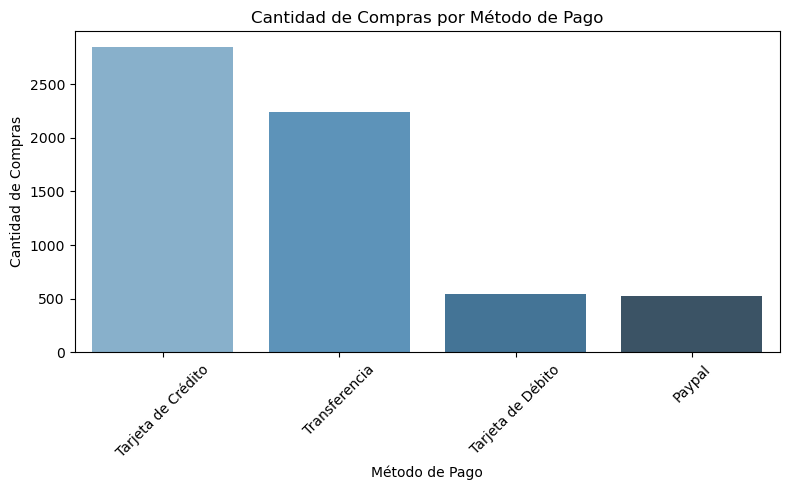

In [32]:
# Gráfico seleccionado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Visualización
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", palette="Blues_d")

plt.title("Cantidad de Compras por Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Prompt

Ahora llegó el momento de refinar nuestras visualizaciones. Comencemos con el primer gráfico que hicimos, el de los métodos de pago.

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, las columnas en el color ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Métodos de pago más utilizados en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas así como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tamaño 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gráfico deben ser suprimidos.

Además, es necesario mostrar el total de cada método de pago encima de cada columna, con el texto también en el color AZUL_1 y tamaño 12.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

### Respuesta

Perfecto, con base en tus indicaciones para respetar la identidad visual de Zoop, a continuación te muestro el código refinado del gráfico **"Métodos de pago más utilizados en 2023"**:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores institucionales
ROJO_1 = "#e23155"
AZUL_1 = "#203f75"
GRIS_1 = "#ebebeb"
GRIS_5 = "#231f20"

# 1. Crear tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Visualización
plt.figure(figsize=(10, 6), facecolor=GRIS_1)
ax = sns.barplot(
    data=metodos_de_pago,
    x="metodo_pago",
    y="cantidad",
    color=ROJO_1
)

# Personalización del gráfico
ax.set_facecolor(GRIS_1)
ax.set_title("Métodos de pago más utilizados en 2023", fontsize=18, color=GRIS_5)

# Eje X
ax.set_xlabel("Método de Pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Eje Y (eliminado)
ax.set_ylabel(None)
ax.set_yticks([])

# Quitar los bordes (spines)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# Mostrar cantidades encima de las columnas
for i, row in metodos_de_pago.iterrows():
    ax.text(
        i,
        row["cantidad"] + max(metodos_de_pago["cantidad"]) * 0.01,  # un pequeño margen
        int(row["cantidad"]),
        ha='center',
        fontsize=12,
        color=AZUL_1
    )

plt.tight_layout()
plt.show()
```

---

### ✅ Cambios aplicados:

* Color de fondo: `GRIS_1`
* Color de barras: `ROJO_1`
* Título: tamaño 18, color `GRIS_5`
* Eje Y y ticks eliminados
* Eje X y etiquetas con tamaño 12, color `AZUL_1`
* Bordes superior, izquierdo y derecho ocultos
* Totales sobre las columnas en color `AZUL_1` y tamaño 12

¿Deseas aplicar este mismo estilo a otras visualizaciones del proyecto?


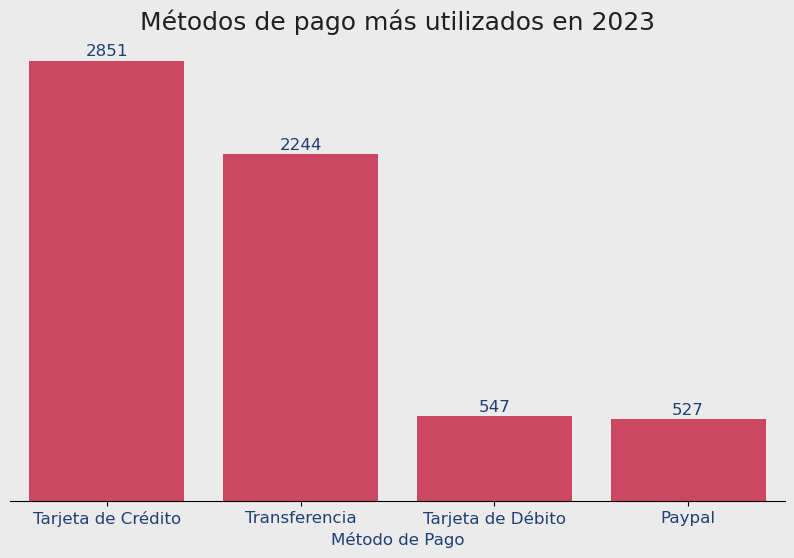

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Paleta de colores institucionales
# ROJO_1 = "#e23155"
# AZUL_1 = "#203f75"
# GRIS_1 = "#ebebeb"
# GRIS_5 = "#231f20"

# 1. Crear tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Visualización
plt.figure(figsize=(10, 6), facecolor=GRIS_1)
ax = sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", color=ROJO_1)

# Personalización del gráfico
ax.set_facecolor(GRIS_1)
ax.set_title("Métodos de pago más utilizados en 2023", fontsize=18, color=GRIS_5)

# Eje X
ax.set_xlabel("Método de Pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Eje Y (eliminado)
ax.set_ylabel(None)
ax.set_yticks([])

# Quitar los bordes (spines)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# Mostrar cantidades encima de las columnas
for i, row in metodos_de_pago.iterrows():
    ax.text(
        i,
        row["cantidad"] + max(metodos_de_pago["cantidad"]) * 0.01,  # un pequeño margen
        int(row["cantidad"]),
        ha="center",
        fontsize=12,
        color=AZUL_1,
    )

# plt.tight_layout()
plt.show()

# Añadiendo texto a los gráficos

### Prompt

Ahora quiero añadir un texto dentro del área del gráfico, ¿vamos allá?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posición x=1.5 y y=2500, añade el siguiente texto con tamaño 10 y color AZUL_3: f"$\\\\bf{porcentaje:.2f}$%  de los clientes utilizan Tarjeta de Crédito o Transferencia \npara el pago. Sería interesante considerar asociaciones con \nbancos para la creación de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

### Respuesta

¡Vamos allá! A continuación te muestro cómo calcular el porcentaje de uso de **Tarjeta de Crédito o Transferencia** (asumiendo que esas dos son las dos primeras filas en la tabla `metodos_de_pago`), y luego insertar el texto explicativo en el gráfico con el formato deseado:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores institucionales
ROJO_1 = "#e23155"
AZUL_1 = "#203f75"
AZUL_3 = "#19325b"
GRIS_1 = "#ebebeb"
GRIS_5 = "#231f20"

# 1. Crear tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Calcular porcentaje
top_2 = metodos_de_pago["cantidad"][:2].sum()
total = metodos_de_pago["cantidad"].sum()
porcentaje = round((top_2 / total) * 100, 1)

# 3. Visualización
plt.figure(figsize=(10, 6), facecolor=GRIS_1)
ax = sns.barplot(
    data=metodos_de_pago,
    x="metodo_pago",
    y="cantidad",
    color=ROJO_1
)

# Personalización del gráfico
ax.set_facecolor(GRIS_1)
ax.set_title("Métodos de pago más utilizados en 2023", fontsize=18, color=GRIS_5)

# Eje X
ax.set_xlabel("Método de Pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Eje Y eliminado
ax.set_ylabel(None)
ax.set_yticks([])

# Quitar bordes
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# Añadir cantidades sobre las barras
for i, row in metodos_de_pago.iterrows():
    ax.text(
        i,
        row["cantidad"] + max(metodos_de_pago["cantidad"]) * 0.01,
        int(row["cantidad"]),
        ha='center',
        fontsize=12,
        color=AZUL_1
    )

# Añadir texto explicativo en el gráfico
texto = (
    f"$\\bf{porcentaje}$% de los clientes utilizan Tarjeta de Crédito o Transferencia \n"
    "para el pago. Sería interesante considerar asociaciones con \n"
    "bancos para la creación de un Zoop Pay con el fin de fidelizar \n"
    "a nuestra clientela."
)

ax.text(1.5, 2500, texto, fontsize=10, color=AZUL_3)

plt.tight_layout()
plt.show()
```

---

### ✅ Este bloque:

* Calcula el porcentaje de uso de los dos métodos de pago más frecuentes.
* Inserta un texto explicativo dentro del área del gráfico (`x=1.5`, `y=2500`).
* Aplica el color institucional `AZUL_3` al texto.
* Respeta la identidad visual y formato definido previamente.

¿Quieres ajustar la posición o adaptar el texto dinámicamente según los métodos más frecuentes?

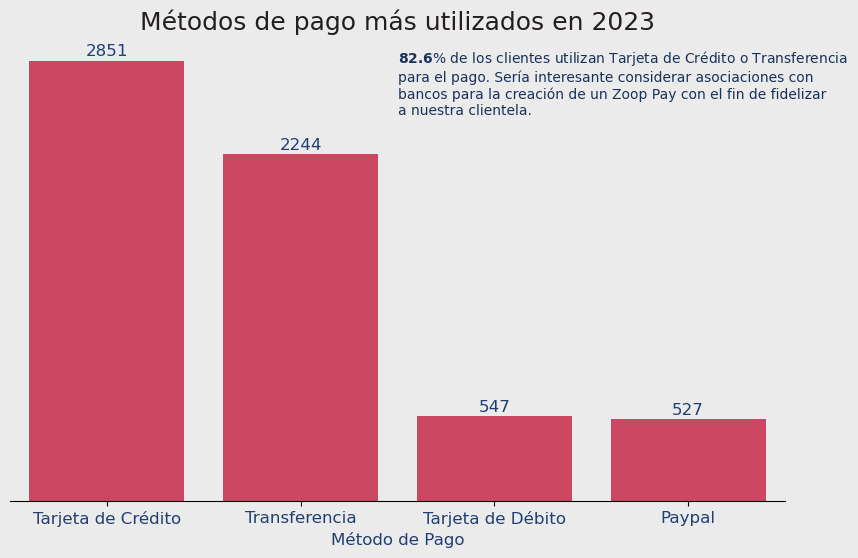

In [34]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Paleta de colores institucionales
# ROJO_1 = "#e23155"
# AZUL_1 = "#203f75"
# AZUL_3 = "#19325b"
# GRIS_1 = "#ebebeb"
# GRIS_5 = "#231f20"

# 1. Crear tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Calcular porcentaje
top_2 = metodos_de_pago["cantidad"][:2].sum()
total = metodos_de_pago["cantidad"].sum()
porcentaje = round((top_2 / total) * 100, 1)

# 3. Visualización
plt.figure(figsize=(10, 6), facecolor=GRIS_1)
ax = sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", color=ROJO_1)

# Personalización del gráfico
ax.set_facecolor(GRIS_1)
ax.set_title("Métodos de pago más utilizados en 2023", fontsize=18, color=GRIS_5)

# Eje X
ax.set_xlabel("Método de Pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Eje Y eliminado
ax.set_ylabel(None)
ax.set_yticks([])

# Quitar bordes
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# Añadir cantidades sobre las barras
for i, row in metodos_de_pago.iterrows():
    ax.text(
        i,
        row["cantidad"] + max(metodos_de_pago["cantidad"]) * 0.01,
        int(row["cantidad"]),
        ha="center",
        fontsize=12,
        color=AZUL_1,
    )

# Añadir texto explicativo en el gráfico
texto = (
    f"$\\bf{porcentaje}$% de los clientes utilizan Tarjeta de Crédito o Transferencia \n"
    "para el pago. Sería interesante considerar asociaciones con \n"
    "bancos para la creación de un Zoop Pay con el fin de fidelizar \n"
    "a nuestra clientela."
)

ax.text(1.5, 2500, texto, fontsize=10, color=AZUL_3)

# plt.tight_layout()
plt.show()

# Añadiendo más elementos visuales

Se elegirá para este fin el gráfico de líneas ***VentasTotales mensuales de Zoop***.

### Prompt

¿Vamos a explorar otro de los gráficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:

```python
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```

Pero debes sustituirla por:

```python
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que generó el gráfico original fue:
```python
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar únicamente la biblioteca matplotlib con la creación del gráfico siguiendo este ejemplo:

```python
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en color GRIS_1, la línea en color AZUL_1 y el tamaño de la figura debe ser de (12, 6).

El título de la figura es "Ventas totales mensuales en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tamaño 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tamaño 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gráfico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.

### Respuesta

Perfecto, aquí tienes el código actualizado que construye el gráfico de **Ventas totales mensuales en 2023** utilizando exclusivamente **Matplotlib** y respetando toda la identidad visual de Zoop:

```python
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Paleta de colores institucionales
AZUL_1 = "#203f75"
GRIS_1 = "#ebebeb"
GRIS_5 = "#231f20"

# Diccionario de traducción de meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Preparar los datos
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
ventas_mensuales.index = [meses[m] for m in ventas_mensuales.index]  # traducir al español

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar línea
ax.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

# Título
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Ejes
ax.set_xlabel("")  # quitar xlabel
ax.set_ylabel("")  # quitar ylabel

ax.tick_params(axis='x', labelsize=12, labelcolor=AZUL_1)
ax.tick_params(axis='y', labelsize=12, labelcolor=AZUL_1)

# Formato del eje Y: MXN$ X.XX M
def millones_mxn(x, _):
    return f"MXN$ {x/1e6:.2f} M"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones_mxn))

# Quitar bordes derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()
```

---

### ✅ Resultado:

* **Colores**: fondo GRIS\_1, línea AZUL\_1, textos en GRIS\_5 y AZUL\_1.
* **Estilo**: bordes limpios, sin etiquetas de ejes, valores en el eje Y formateados como millones de MXN.
* **Traducción**: los meses están en español y en el orden correcto.

¿Te gustaría incluir también algún texto dentro del área del gráfico como hicimos anteriormente?

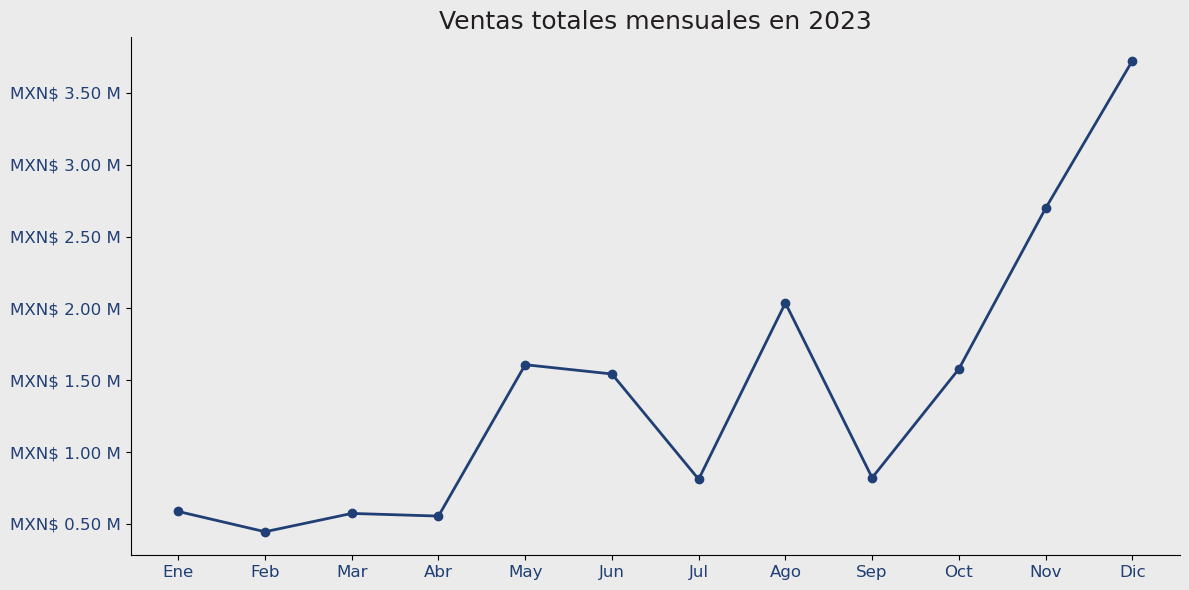

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Paleta de colores institucionales
# AZUL_1 = "#203f75"
# GRIS_1 = "#ebebeb"
# GRIS_5 = "#231f20"

# Diccionario de traducción de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Preparar los datos
df["mes"] = df["fecha"].dt.strftime("%B")
ventas_mensuales = df.groupby("mes")["facturacion"].sum().reindex(meses.keys())
ventas_mensuales.index = [
    meses[m] for m in ventas_mensuales.index
]  # traducir al español

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar línea
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker="o",
    color=AZUL_1,
    linewidth=2,
)

# Título
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Ejes
ax.set_xlabel("")  # quitar xlabel
ax.set_ylabel("")  # quitar ylabel

ax.tick_params(axis="x", labelsize=12, labelcolor=AZUL_1)
ax.tick_params(axis="y", labelsize=12, labelcolor=AZUL_1)


# Formato del eje Y: MXN$ X.XX M
def millones_mxn(x, _):
    return f"MXN$ {x/1e6:.2f} M"


ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones_mxn))

# Quitar bordes derecho y superior
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

### Prompt

¡Genial! Ahora que nuestro gráfico ya tiene la identidad visual, vamos a añadir algunos elementos visuales adicionales.

Dibuja 4 círculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5º, 8º, 11º y 12º puntos, respectivamente. A la izquierda de cada círculo enumera del 1 al 4.

> ❗ Este prompt no fue lo suficientemente bueno para mi caso de uso, por lo que utilicé el siguiente con un par de iteraciones para regular el tamaño de los círculos:

Manteniendo el gráfico anterior, queremos agregar un detalle adicional para destacar los 4 puntos con mayores ventas del año. La idea es crear círculos que envuelvan esos puntos y sea más fácil de leer y analizar:

- Agrega 4 círculos de radio 200
- el centro de cada círculo debe estar en los 4 puntos con mayores ventas
- deben ser de color transparentes con el borde en color ROJO_1 y 
- A la izquierda de cada círculo enumera del 1 al 4.

Puedes utilizar plt.scatter y plt.text para desarrollar esta sección.


### Respuesta

¡Gracias por tu observación! El problema se debe a que estamos utilizando coordenadas de datos (índice y valor de ventas) para colocar los **círculos (`Circle`)**, pero el parámetro `radius` está interpretando unidades del sistema de coordenadas del gráfico, lo que hace que los círculos no se vean correctamente (aparecen como líneas o elipses).

### ✅ Solución:

En lugar de usar `Circle`, usaremos `matplotlib.patches.Ellipse` **con coordenadas en pixeles del gráfico** (usando `transforms`) o bien ajustamos la proporción de los ejes con `ax.set_aspect`.

Pero una forma **mucho más sencilla y precisa** es usar `plt.scatter()` con `s` (size) adecuado para simular el círculo, y luego superponer el número.

Aquí te dejo el código corregido con **círculos bien visibles** y numeración al lado:

```python
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Paleta de colores institucionales
AZUL_1 = "#203f75"
GRIS_1 = "#ebebeb"
GRIS_5 = "#231f20"
ROJO_1 = "#e23155"

# Diccionario de traducción de meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Preparar los datos
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
ventas_mensuales.index = [meses[m] for m in ventas_mensuales.index]

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar línea principal
x = np.arange(len(ventas_mensuales))
y = ventas_mensuales.values
ax.plot(x, y, marker='o', color=AZUL_1, linewidth=2)

# Título
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Ejes
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks(x)
ax.set_xticklabels(ventas_mensuales.index, fontsize=12, color=AZUL_1)
ax.tick_params(axis='y', labelsize=12, labelcolor=AZUL_1)

# Formato del eje Y
def millones_mxn(x, _):
    return f"MXN$ {x/1e6:.2f} M"
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones_mxn))

# Quitar bordes derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Encontrar los 4 puntos más altos
top_ventas = ventas_mensuales.sort_values(ascending=False).head(4)
for i, (mes, valor) in enumerate(top_ventas.items(), 1):
    idx = list(ventas_mensuales.index).index(mes)
    
    # Dibujar círculo con scatter
    ax.scatter(idx, valor, s=6000, facecolors='none', edgecolors=ROJO_1, linewidth=2)
    
    # Agregar número a la izquierda
    ax.text(idx - 0.6, valor, str(i), fontsize=12, color=ROJO_1, va='center')

plt.tight_layout()
plt.show()
```

---

### 🟢 ¿Qué mejoramos?

* Usamos `scatter(..., s=6000)` para dibujar círculos grandes y visibles.
* Evitamos problemas de escala de ejes con `Circle`.
* La enumeración del 1 al 4 se posiciona **a la izquierda del punto**, como pediste.

¿Te gustaría también mostrar una leyenda o tooltip para explicar qué significan esos puntos destacados?

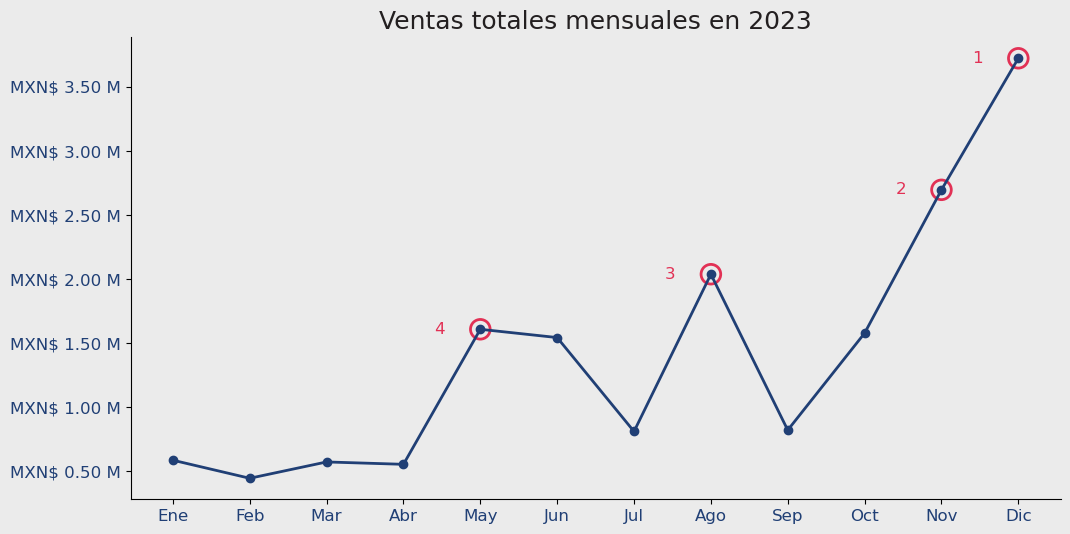

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle

# Paleta de colores institucionales
AZUL_1 = "#203f75"
GRIS_1 = "#ebebeb"
GRIS_5 = "#231f20"
ROJO_1 = "#e23155"

# Diccionario de traducción de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Preparar los datos
df["mes"] = df["fecha"].dt.strftime("%B")
ventas_mensuales = df.groupby("mes")["facturacion"].sum().reindex(meses.keys())
ventas_mensuales.index = [meses[m] for m in ventas_mensuales.index]

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar línea
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker="o",
    color=AZUL_1,
    linewidth=2,
)

# Título
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Ejes
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="x", labelsize=12, labelcolor=AZUL_1)
ax.tick_params(axis="y", labelsize=12, labelcolor=AZUL_1)


# Formato del eje Y
def millones_mxn(x, _):
    return f"MXN$ {x/1e6:.2f} M"


ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones_mxn))

# Quitar bordes derecho y superior
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Encontrar los 4 puntos más altos
top_ventas = ventas_mensuales.sort_values(ascending=False).head(4)
for i, (mes, valor) in enumerate(top_ventas.items(), 1):
    idx = list(ventas_mensuales.index).index(mes)

    # Dibujar círculo con scatter
    ax.scatter(idx, valor, s=200, facecolors="none", edgecolors=ROJO_1, linewidth=2)

    # Agregar número a la izquierda
    ax.text(idx - 0.6, valor, str(i), fontsize=12, color=ROJO_1, va="center")

# plt.tight_layout()
plt.show()

#### Comentarios
---
Hemos añadido 4 círculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hipótesis:

1. En mayo, tenemos una de las fechas más relevantes en ventas: el Día de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situación que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales períodos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos las festividades de Año Nuevo, consideradas el período de mayores ventas no solo para Zoop, sino para el comercio minorista en general.
La recomendación es investigar más a fondo los datos y llegar a tus propias conclusiones.

Antes de ajustar los últimos 5 visuales de nuestro proyecto, vamos a hacer una pequeña modificación en los 2 primeros, convirtiéndolos en funciones, lo que facilitará más adelante cuando realicemos la exportación